In [1]:
# import to supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

In [2]:
#import sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

from IPython.display import display
pd.options.display.max_columns = None

## Step-1 :  Reading and Understanding the Data

In [4]:
# Reading data from Leads.csv file

lead_score_data = pd.read_csv(r'C:\Users\saksh\Downloads\Leads.csv')

In [5]:
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Lets check shape of data

lead_score_data.shape

(9240, 37)

#### The dataset has 9240 rows and 37 columns

In [8]:
# Lets see the types of the feature variables and the null values present using info()

lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### By looking above info, it seems there are quite few categorical varaibles present in data, therefore, we need to create the dummy variables for same.

In [10]:
# Lets check the summary of the dataset

lead_score_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Data Cleaning :
#####            1. Check missing or null values in dataset
#####            2. Drop unwanted columns from dataset

In [12]:
# check if any null values present in dataset columns

lead_score_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Checking the percentage of missing values

null_col = round(100*(lead_score_data.isnull().sum()/len(lead_score_data.index)), 2)
null_col

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Find the columns of dataset whose percentage of null values is greater than 30%

null_col = list(null_col[null_col.values >= 30.0].index)
null_col

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### -- Drop Irrelevant Columns 

In [16]:
# Dropping the unwanted columns having more than 30% null values in Dataset

lead_score_data.drop(labels = null_col , axis = 1 , inplace = True)

print(len(null_col))  # to print number of columns deleted from dataset

6


In [17]:
# Checking updated info of dataset

lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# Display the updated shape of Dataset

lead_score_data.shape

(9240, 31)

In [19]:
# print the value counts of all the columns

for col in lead_score_data:
    print(lead_score_data[col].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


There are some columns that contains Select, which means that the student had not selected any option for that particular column therefore, it shows 'Select'.

In [21]:
# Select all non-numeric columns
lead_obj = lead_score_data.select_dtypes(include='object')

# Find out columns that have value "Select"

s = lambda x: x.str.contains('Select', na=False)
l = lead_obj.columns[lead_obj.apply(s).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#### Visualizing the columns with 'Select' values

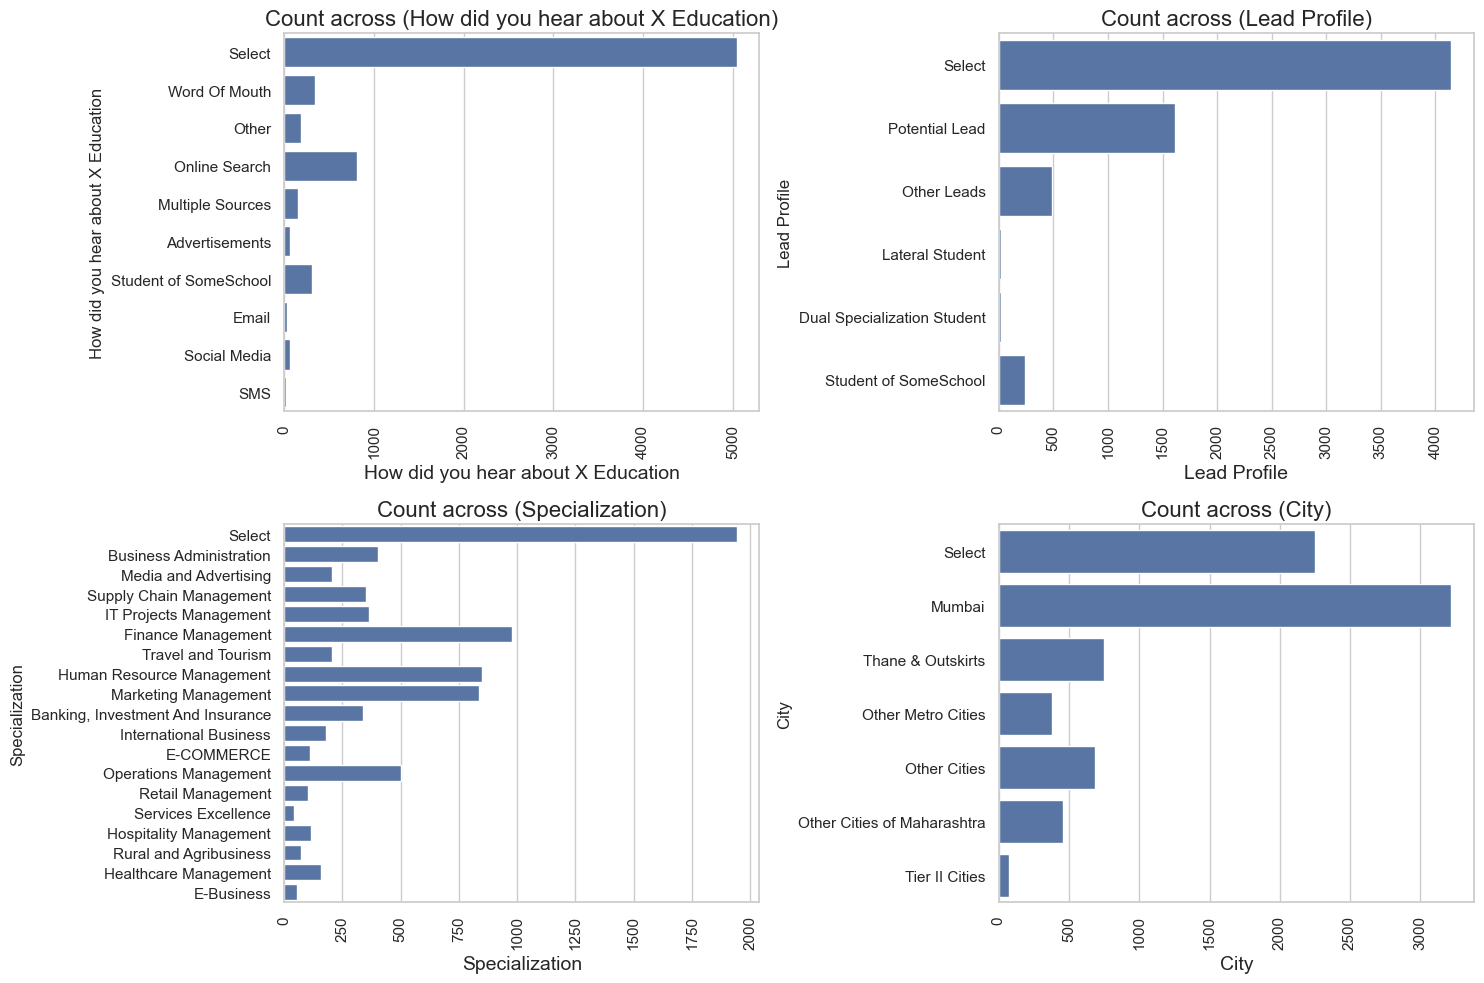

In [23]:
# Lets figure out the total 'Select' value in columns using plot

def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(lead_score_data[x])
    plt.title('Count across'+' ('+ x + ')', size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)
countplot('City',4)


plt.tight_layout()

The above 4 columns now have the level 'Select'.

In [25]:
# Check value count of "Select" in column 'Lead Profile'

lead_score_data['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [26]:
# Check value count of "Select" in column 'How did you hear about X Education'

lead_score_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [27]:
# Check value count of "Select" in column 'Specialization'

lead_score_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

From above analysis, we can see that the column 'Lead Profile' and 'How did you hear about X Education' has highest number of rows with 'Select' values that can be consider same as missing values, therefore we can drop them as they are of no use for further analysis.

In [29]:
# Dropping 'Lead Profile' and 'How did you hear about X Education' column from dataset

lead_score_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [30]:
# Checking the number of null values again

lead_score_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

There are still 4 columns with huge null values. As they are important columns, removing them will cost us a lot of data. So, instead we are going to replace the NaN values with 'no data'. This way we have all the data with almost no null values. We can drop them off later, if they are of no use further.

In [32]:
lead_score_data['Specialization'] = lead_score_data['Specialization'].fillna('no data') 
lead_score_data['What matters most to you in choosing a course'] = lead_score_data['What matters most to you in choosing a course'].fillna('no data')
lead_score_data['Country'] = lead_score_data['Country'].fillna('no data')
lead_score_data['What is your current occupation'] = lead_score_data['What is your current occupation'].fillna('no data')
lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [33]:
# Checking the number of null values again

lead_score_data.isnull().sum().sort_values(ascending=False)

City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
What matters most to you in choosing a course       0
Magazine                                            0
Search                      

##### As we can see above that "City" column still has maximum number of null values. So lets handle the null values of 'City'.

In [35]:
lead_score_data['City'].value_counts(normalize = True, dropna = False) * 100

City
Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [36]:
# categorize all non-mumbai, but Maharashtra cities
lead_score_data.loc[(lead_score_data.City == 'Thane & Outskirts') | (lead_score_data.City == 'Other Cities of Maharashtra'), 'City'] = 'Non-Mumbai MH Cities'

# categorize all other cities
lead_score_data.loc[(lead_score_data.City == 'Other Cities') | (lead_score_data.City == 'Other Metro Cities') | (lead_score_data.City == 'Tier II Cities') , 'City'] = 'Non-MH Cities'

In [37]:
# replace 'Select' values to null values

lead_score_data['City'] = lead_score_data['City'].replace('Select', np.NaN)
lead_score_data['City'].head()

0       NaN
1       NaN
2    Mumbai
3    Mumbai
4    Mumbai
Name: City, dtype: object

In [38]:
# Let check the updated value counts in column 'City'

lead_score_data.City.value_counts(normalize = True) * 100

City
Mumbai                  57.835218
Non-Mumbai MH Cities    21.701669
Non-MH Cities           20.463113
Name: proportion, dtype: float64

In [39]:
# Lets impute proportionately

lead_score_data['City'] = lead_score_data.City.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai MH Cities','Non-MH Cities'], p = [0.5784, 0.2170, 0.2046 ], size = len(lead_score_data))))

In [40]:
# Lets check final updated column 'City'

lead_score_data['City'].value_counts()

City
Mumbai                  5321
Non-Mumbai MH Cities    2007
Non-MH Cities           1912
Name: count, dtype: int64

#### 'What is your current occupation' Column

In [42]:
# Check value count of column 'What is your current occupation'

lead_score_data['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

What is your current occupation
Unemployed              60.606061
no data                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

##### Note : For occupation, lets combine categories first, then impute proportionally to maintain the distribution and not introduce bias

In [44]:
# combine low representing categories
lead_score_data.loc[(lead_score_data['What is your current occupation'] == 'Student') | (lead_score_data['What is your current occupation'] == 'Other') 
                            | (lead_score_data['What is your current occupation'] == 'Housewife') | 
                (lead_score_data['What is your current occupation'] == 'Businessman') , 'What is your current occupation'] = 'Student and Others'

In [45]:
# Lets check again the value count of updated column

lead_score_data['What is your current occupation'].value_counts(normalize = True) * 100

What is your current occupation
Unemployed              60.606061
no data                 29.112554
Working Professional     7.640693
Student and Others       2.640693
Name: proportion, dtype: float64

In [46]:
# replace 'no data' values to null values

lead_score_data['What is your current occupation'] = lead_score_data['What is your current occupation'].replace('no data', np.NaN)
lead_score_data['What is your current occupation']

0               Unemployed
1               Unemployed
2       Student and Others
3               Unemployed
4               Unemployed
               ...        
9235            Unemployed
9236            Unemployed
9237            Unemployed
9238                   NaN
9239            Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

In [47]:
# Lets check again the value count of updated column

lead_score_data['What is your current occupation'].value_counts(normalize = True) * 100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: proportion, dtype: float64

In [48]:
# Lets impute proportionately

lead_score_data['What is your current occupation'] = lead_score_data['What is your current occupation'].fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                        'Student and Others'], p = [0.8550, 0.1078, 0.0372], size = len(lead_score_data))))

In [49]:
# Lets check final value count of updated column

lead_score_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              7938
Working Professional     967
Student and Others       335
Name: count, dtype: int64

#### 'Specialization' Column

In [51]:
lead_score_data.Specialization.value_counts(normalize = True, dropna = False) * 100

Specialization
Select                               21.017316
no data                              15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

##### Note : For specialization, combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias

In [53]:
# categorize all industry courses
lead_score_data.loc[(lead_score_data.Specialization == 'Banking, Investment And Insurance') | (lead_score_data.Specialization == 'Media and Advertising') |
       (lead_score_data.Specialization == 'Travel and Tourism') | (lead_score_data.Specialization == 'Services Excellence') |
       (lead_score_data.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

# categorize all management courses
lead_score_data.loc[(lead_score_data.Specialization == 'Finance Management') | (lead_score_data.Specialization == 'Human Resource Management') | 
       (lead_score_data.Specialization == 'Marketing Management') |  (lead_score_data.Specialization == 'Operations Management') |
       (lead_score_data.Specialization == 'IT Projects Management') | (lead_score_data.Specialization == 'Supply Chain Management') |
       (lead_score_data.Specialization == 'Healthcare Management') | (lead_score_data.Specialization == 'Hospitality Management') |
       (lead_score_data.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
lead_score_data.loc[(lead_score_data.Specialization == 'Business Administration') | (lead_score_data.Specialization == 'International Business') | 
       (lead_score_data.Specialization == 'Rural and Agribusiness') | (lead_score_data.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

In [54]:
# Lets check the value count now

lead_score_data.Specialization.value_counts(normalize = True) * 100

Specialization
Management Specializations    46.028139
Select                        21.017316
no data                       15.562771
Industry Specializations       9.696970
Business Specializations       7.694805
Name: proportion, dtype: float64

In [55]:
# replace 'no data' and select values to null values

lead_score_data.Specialization = lead_score_data.Specialization.replace('no data', np.NaN)
lead_score_data.Specialization = lead_score_data.Specialization.replace('Select', np.NaN)
lead_score_data.Specialization

0                              NaN
1                              NaN
2         Business Specializations
3         Industry Specializations
4                              NaN
                   ...            
9235    Management Specializations
9236      Industry Specializations
9237      Business Specializations
9238    Management Specializations
9239    Management Specializations
Name: Specialization, Length: 9240, dtype: object

In [56]:
# Lets check again the value count of updated column

lead_score_data.Specialization.value_counts(normalize = True) * 100

Specialization
Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: proportion, dtype: float64

In [57]:
# impute proportionately
lead_score_data['Specialization'] = lead_score_data.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations', 'Business Specializations', 
                                        'Industry Specializations'], p = [0.7258, 0.1213, 0.1529 ], size = len(lead_score_data))))

In [58]:
# Lets check final value count of updated column

lead_score_data['Specialization'].value_counts()

Specialization
Management Specializations    6681
Industry Specializations      1432
Business Specializations      1127
Name: count, dtype: int64

#### 'What matters most to you in choosing a course' Column

In [60]:
lead_score_data['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

What matters most to you in choosing a course
Better Career Prospects      70.649351
no data                      29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

##### Note : The distribution of the data is very heavily skewed, with Better career prospects + no data values = approx 100% of the total. It is safe to drop this column.

In [62]:
# Dropping the column 'What matters most to you in choosing a course'

lead_score_data.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### 'Country' Column

In [64]:
# Lets find value count of 'Country' column

lead_score_data['Country'].value_counts(normalize = True, dropna = False) * 100

Country
India                   70.259740
no data                 26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

##### Note : The distribution of the data is very heavily skewed, with India + no data values = 97% of the total. It is safe to drop this column.

In [66]:
# dropping the column 'Country'

lead_score_data.drop('Country', axis = 1, inplace = True)

In [67]:
# Checking the number of null values again

lead_score_data.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
City                                          0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
What is your current occupation               0
Specialization                          

There are 4 columns 'TotalVisits' , 'Page Views Per Visit' , 'Last Activity' and 'Lead Source' in dataset which still has some null values. Lets take care of them in further steps.

#### Handling the categorical columns with less number of missing values:
#####      1. Merge categories that have low representation of categories
#####      2. Impute the missing values

In [70]:
# lets find out the unique values for all object datatype columns

for a, b in lead_score_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Prospect ID = 9240
Lead Origin = 5
Lead Source = 21
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
Specialization = 3
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


##### Note : From the above result, we can see that, the categorical columns with (number of unique values > 2) are:
#####     1.  'Lead Origin'
#####     2. 'Lead Source'

#### 'Lead Origin' Column

In [73]:
# Lets find value count of 'Lead Origin' column

lead_score_data['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64

##### Note : There are a lots of smaller values which won't be used as definitive factors, therefore, lets group them together

In [75]:
# combine low representing categories

lead_score_data.loc[(lead_score_data['Lead Origin'] == 'Lead Import') | (lead_score_data['Lead Origin'] == 'Quick Add Form') 
                    | (lead_score_data['Lead Origin'] == 'Lead Add Form'), 'Lead Origin'] = 'Lead Add Forms and Others'

# Lets check final value count of updated column

lead_score_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission      4886
API                          3580
Lead Add Forms and Others     774
Name: count, dtype: int64

#### 'Lead Source' Column

In [77]:
# Lets find value count of 'Lead Source' column

lead_score_data['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

In [78]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'

lead_score_data['Lead Source'].fillna(lead_score_data['Lead Source'].mode()[0], inplace=True)

##### Note : There are a lots of smaller values which won't be used as definitive factors, therefore, lets group them together

In [80]:
# combine low representing categories

lead_score_data['Lead Source'] = lead_score_data['Lead Source'].apply(lambda x: x if ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') 
                                        |  (x=='Organic Search') | (x=='Reference') | (x=='Welingak Website'))else 'Other Social Sites')

# Lets check final value count of updated column

lead_score_data['Lead Source'].value_counts()

Lead Source
Google                2904
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Reference              534
Other Social Sites     208
Welingak Website       142
Name: count, dtype: int64

#### 'Last Activity' Column

In [82]:
# Lets find value count of 'Lead Source' column

lead_score_data['Last Activity'].value_counts(normalize = True, dropna = False) * 100

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

In [83]:
# Lets impute the missing values with the mode of data i.e. clearly 'Email Opened'

lead_score_data['Last Activity'].fillna(lead_score_data['Last Activity'].mode()[0], inplace=True)

In [84]:
lead_score_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### Handling columns with Binary values :

#####  1. Drop those columns with significant data imbalance
#####  2. Drop the columns having only 1 unique entry

In [86]:
# lets find out the unique values for all object datatype columns

for a, b in lead_score_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Prospect ID = 9240
Lead Origin = 3
Lead Source = 7
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
Specialization = 3
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


As per above result, the columns having just 1 unique values are :

1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque

##### Note : Above listed columns are having only one value majorly present for all the data points. Practically all of the values for these variables are 'No', therefore, we can drop these columns as they won't help with our analysis.

#### Data Imbalance Check :

In [90]:
# Lets take rest of the binary columns in a new dataframe

lead_score_bin = lead_score_data[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# Lets see value counts for each of the above listed columns

for i in lead_score_bin.columns:
    x = (lead_score_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

Do Not Email
No     92.056277
Yes     7.943723
Name: proportion, dtype: float64

Do Not Call
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

Search
No     99.848485
Yes     0.151515
Name: proportion, dtype: float64

Newspaper Article
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

X Education Forums
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Newspaper
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Digital Advertisement
No     99.95671
Yes     0.04329
Name: proportion, dtype: float64

Through Recommendations
No     99.924242
Yes     0.075758
Name: proportion, dtype: float64

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64



##### Note : Except the column 'A free copy of Mastering The Interview' and 'Do Not Email', all above columns shows heavy data imbalance.

Because of heavy data imbalance, we are dropping the following columns:

1. Do Not Call
2. Search
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement
7. Through Recommendations

In [93]:
lead_drop_bin = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
            'Through Recommendations', 'A free copy of Mastering The Interview', 'Magazine','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

lead_score_data.drop(lead_drop_bin, axis = 1, inplace = True)

In [94]:
# Dropping the "Prospect ID" and "Lead Number" columns

lead_score_data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

##### Note : Above columns 'Prospect ID' and 'Lead Number' won't be of any use in the analysis as they had unique values for each rows, therefore, we drop them.

#### Handling Columns with Numerical Values:

#### 'TotalVisits' Column

In [98]:
# fill null values with median of data

lead_score_data.TotalVisits.fillna(lead_score_data.TotalVisits.median(), inplace=True)

# converting the datatype to integer as column 'TotalVisits' can't be decimal

lead_score_data.TotalVisits = lead_score_data.TotalVisits.astype('int')

In [99]:
lead_score_data.TotalVisits

0       0
1       5
2       2
3       1
4       2
       ..
9235    8
9236    2
9237    2
9238    3
9239    6
Name: TotalVisits, Length: 9240, dtype: int32

#### 'Page Views Per Visit' Column

In [101]:
# fill null values with median of data

lead_score_data['Page Views Per Visit'].fillna(lead_score_data['Page Views Per Visit'].median(), inplace=True)

# Lets check final value count of updated column

lead_score_data['Page Views Per Visit']

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64

In [102]:
# Checking the number of null values again

lead_score_data.isnull().sum().sort_values(ascending=False)

Lead Origin                        0
Lead Source                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
City                               0
Last Notable Activity              0
dtype: int64

##### Note : Now there are no missing values left in columns of dataset. Lets check percentage of rows retained.

## Step-2 : EDA - Visualising the Data

In [105]:
# Lets print updated info of lead_score_data detaset

lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9240 non-null   int32  
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9240 non-null   float64
 6   Last Activity                    9240 non-null   object 
 7   Specialization                   9240 non-null   object 
 8   What is your current occupation  9240 non-null   object 
 9   City                             9240 non-null   object 
 10  Last Notable Activity            9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 758.1+ KB


### 2.1 Numerical Variable Analysis

#### ~ Visualising the linear relationship of numerical variables in dataset :

<Figure size 1300x1300 with 0 Axes>

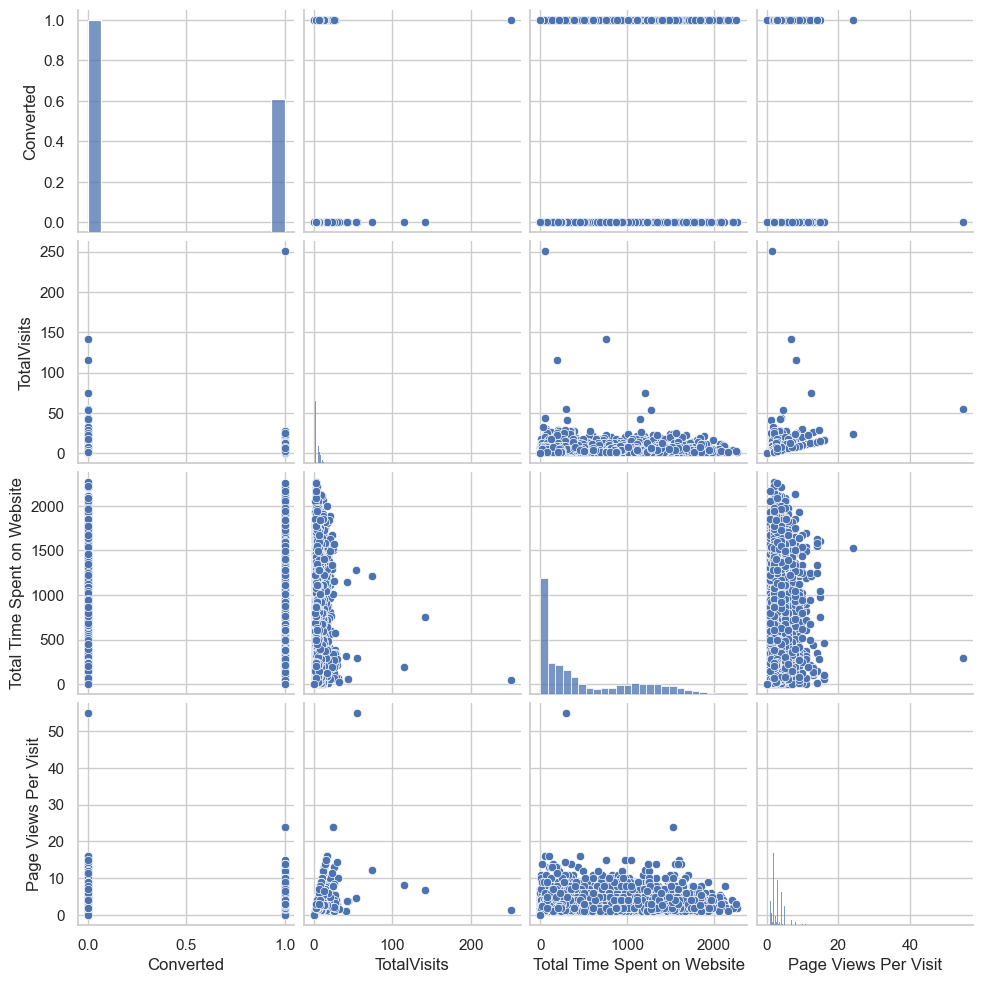

In [108]:
# Plotting all the variables of dataset using pairplot

plt.figure(figsize=(13,13))
sns.pairplot(lead_score_data)
plt.show()

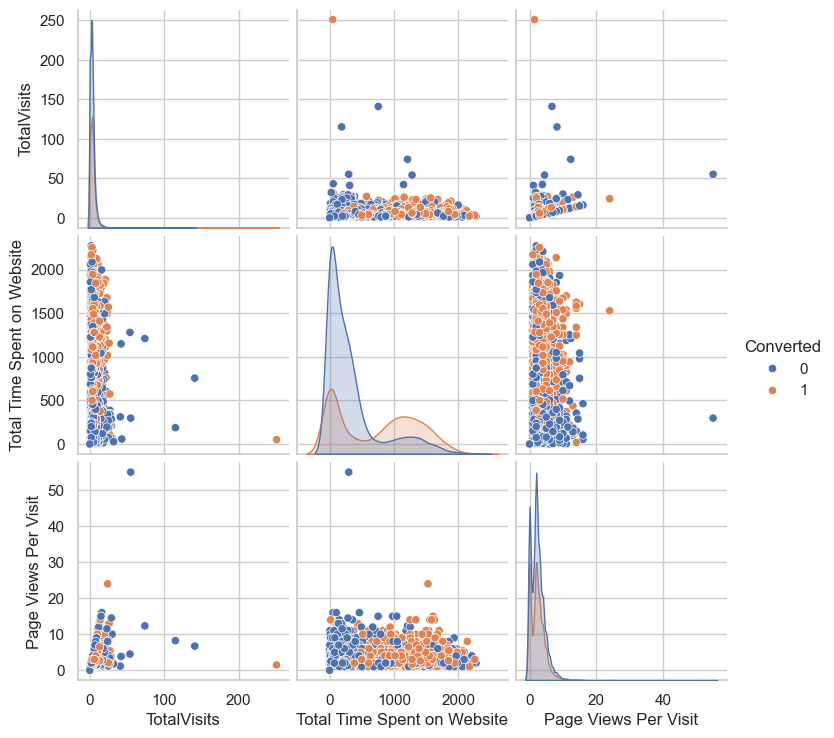

In [109]:
# Plotting numeric variables of dataset using pairplot w.r.t "Converted" 

lead = lead_score_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

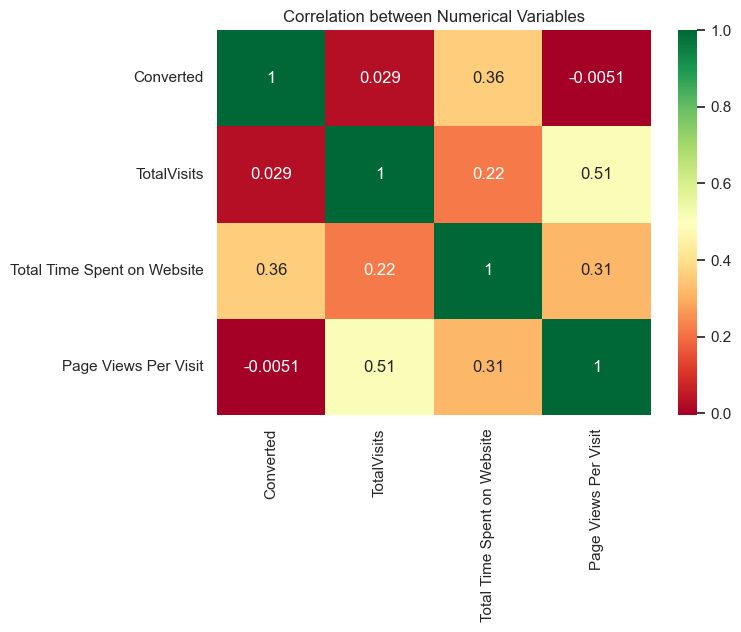

In [110]:
# Plotting the correlation for numerical variables using Heatmap

plt.figure(figsize=(7,5))
sns.heatmap(lead_score_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),cmap="RdYlGn",annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

##### Note : As we can't see any correlation among above data variables.

In [112]:
# describe the numeric variables to find outliers

num = lead_score_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


In [113]:
# capping at 99 percentile

lead_score_data['TotalVisits'].loc[lead_score_data['TotalVisits'] >= 
                            lead_score_data['TotalVisits'].quantile(0.99)] = lead_score_data['TotalVisits'].quantile(0.99)

lead_score_data['Page Views Per Visit'].loc[lead_score_data['Page Views Per Visit'] >= 
                            lead_score_data['Page Views Per Visit'].quantile(0.99)] = lead_score_data['Page Views Per Visit'].quantile(0.99)

##### Note : We can't find any major outliers in numeric variables of dataset.

### 2.2 Categorical Variable Analysis

#### ~ Plotting the relationship of categorical variables w.r.t 'Converted':

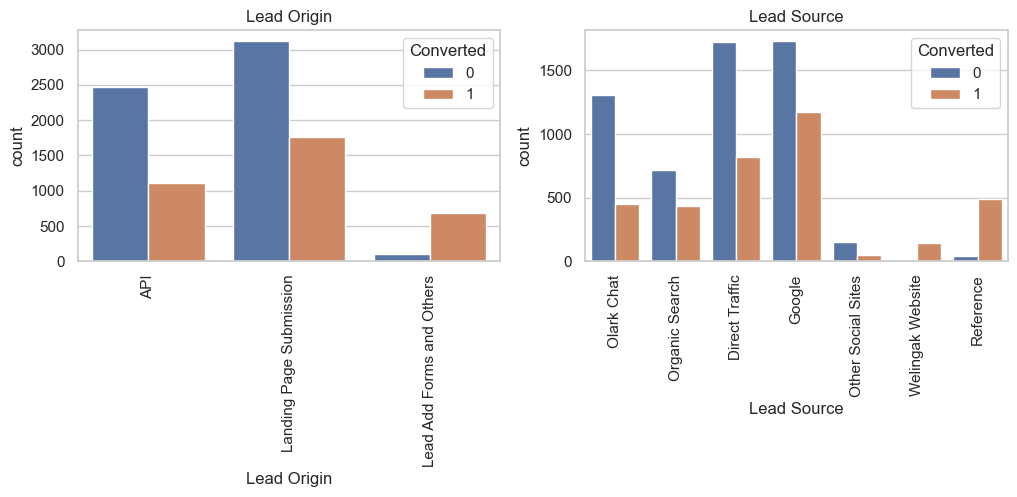

In [117]:
# Plot 'Lead Origin' and 'Lead Source' vs 'Converted'

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

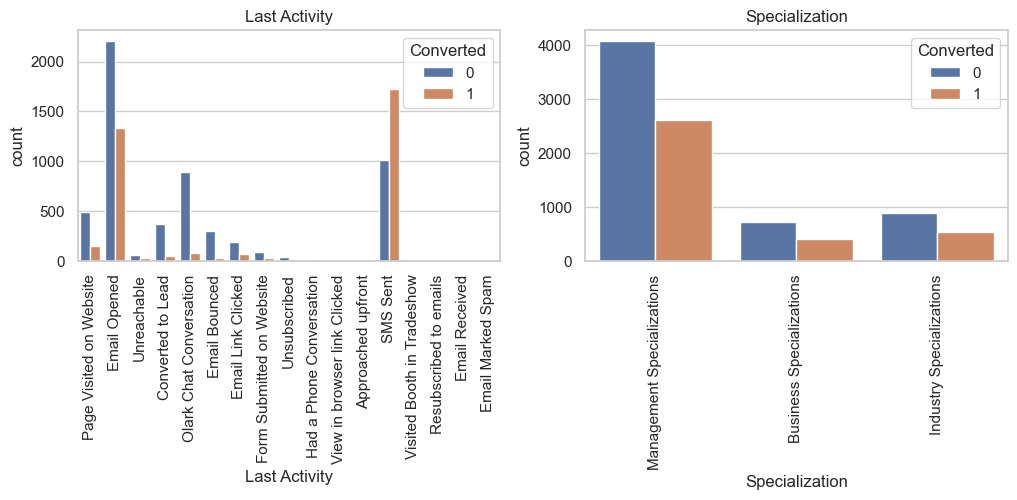

In [118]:
# Plot 'Last Activity'  and  'Specialization'  vs  'Converted'

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

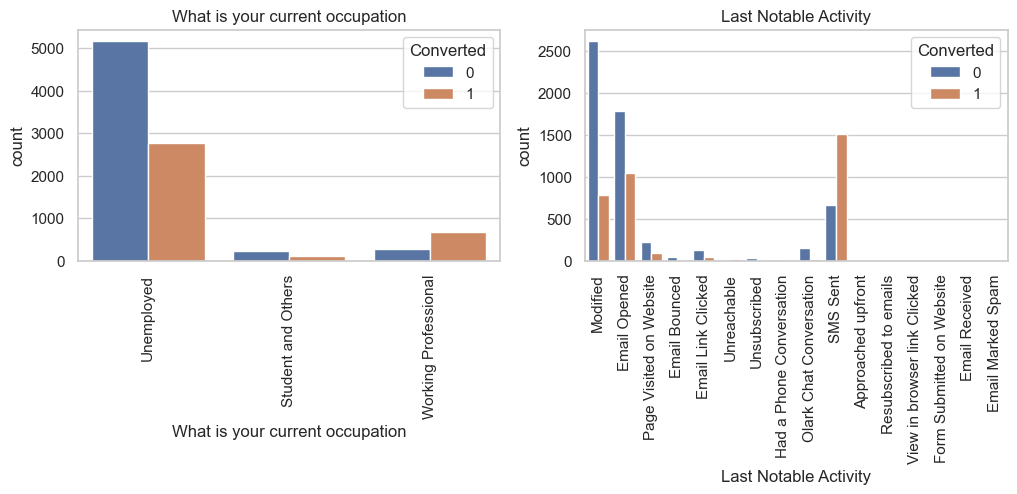

In [119]:
# Plot 'What is your current occupation'  and  'Last Notable Activity'  vs  'Converted'

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')


plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


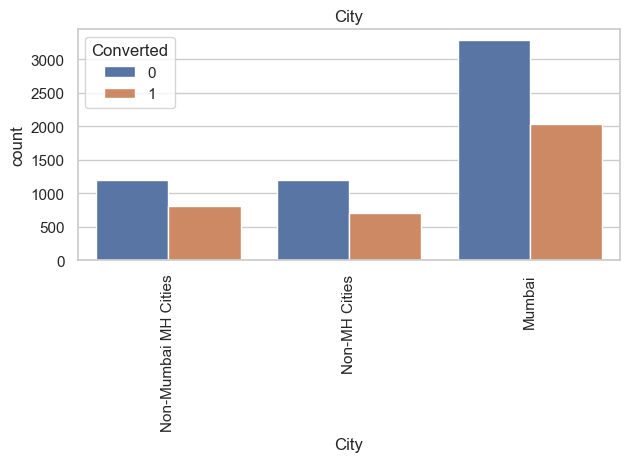

In [120]:
# Plot 'City'  vs 'Converted'

plt.figure(figsize = (7,3))

sns.countplot(x='City', hue='Converted', data= lead_score_data).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

## Step-3 : Data Preparation

#### ~ Creating the dummies variables for categorical variables :

In [123]:
# Creating dummy variables for all categorical variables using 'get_dummies'.

dum_var = pd.get_dummies(lead_score_data[['Lead Origin' ,'Lead Source','Last Activity','Specialization', 'What is your current occupation',
                                          'City', 'Last Notable Activity']], drop_first=True)

#### 3.1 Data Formatting:

In [125]:
# print dataset before adding dummies

lead_score_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Management Specializations,Unemployed,Non-Mumbai MH Cities,Modified
1,API,Organic Search,0,5,674,2.5,Email Opened,Management Specializations,Unemployed,Non-MH Cities,Email Opened
2,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Specializations,Student and Others,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,Industry Specializations,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Management Specializations,Unemployed,Mumbai,Modified


In [126]:
# Merging the 'lead_score_data' dataframe, with the dummy variables dataset and creating new updated dataframe

lead_score_new = pd.concat([lead_score_data, dum_var], axis=1)
lead_score_new

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Forms and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-MH Cities,City_Non-Mumbai MH Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.00,Page Visited on Website,Management Specializations,Unemployed,Non-Mumbai MH Cities,Modified,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,0,5,674,2.50,Email Opened,Management Specializations,Unemployed,Non-MH Cities,Email Opened,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,1,2,1532,2.00,Email Opened,Business Specializations,Student and Others,Mumbai,Email Opened,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,1,305,1.00,Unreachable,Industry Specializations,Unemployed,Mumbai,Modified,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,1,2,1428,1.00,Converted to Lead,Management Specializations,Unemployed,Mumbai,Modified,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8,1845,2.67,Email Marked Spam,Man

In [127]:
# print updated info for new dataset 'lead_score_new'

lead_score_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9240 non-null   object 
 1   Lead Source                                           9240 non-null   object 
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   int32  
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Last Activity                                         9240 non-null   object 
 7   Specialization                                        9240 non-null   object 
 8   What is your current occupation                       9240

#### ~ Converting Binary (False/True) to 0/1

In [129]:
lead_bin = ['Lead Origin_Landing Page Submission','Lead Origin_Lead Add Forms and Others','Lead Source_Google','Lead Source_Olark Chat',
            'Lead Source_Organic Search','Lead Source_Other Social Sites','Lead Source_Reference','Lead Source_Welingak Website',
            'Last Activity_Converted to Lead','Last Activity_Email Bounced','Last Activity_Email Link Clicked','Last Activity_Email Marked Spam',
            'Last Activity_Email Opened','Last Activity_Email Received','Last Activity_Form Submitted on Website',
            'Last Activity_Had a Phone Conversation','Last Activity_Olark Chat Conversation','Last Activity_Page Visited on Website',
            'Last Activity_Resubscribed to emails','Last Activity_SMS Sent','Last Activity_Unreachable','Last Activity_Unsubscribed',
            'Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Specialization_Industry Specializations',
            'Specialization_Management Specializations','What is your current occupation_Unemployed','What is your current occupation_Working Professional',
            'City_Non-MH Cities','City_Non-Mumbai MH Cities','Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked',
            'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
            'Last Notable Activity_Form Submitted on Website','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Modified',
            'Last Notable Activity_Olark Chat Conversation','Last Notable Activity_Page Visited on Website','Last Notable Activity_Resubscribed to emails',
            'Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed',
            'Last Notable Activity_View in browser link Clicked']

In [130]:
# Defining the map function

def bin_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
lead_score_new[lead_bin] = lead_score_new[lead_bin].apply(bin_map)

# check the updated data
lead_score_new.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Forms and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-MH Cities,City_Non-Mumbai MH Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Management Specializations,Unemployed,Non-Mumbai MH Cities,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5,674,2.5,Email Opened,Management Specializations,Unemployed,Non-MH Cities,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Specializations,Student and Others,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,Industry Specializations,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Management Specializations,Unemployed,Mumbai,Modified,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [131]:
lead_score_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9240 non-null   object 
 1   Lead Source                                           9240 non-null   object 
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   int32  
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Last Activity                                         9240 non-null   object 
 7   Specialization                                        9240 non-null   object 
 8   What is your current occupation                       9240

In [132]:
# Drop unnecessary columns as we have already created dummy variable for them.

lead_score_new.drop(['Lead Origin','Lead Source','Last Activity','Specialization', 'What is your current occupation',
                                          'City', 'Last Notable Activity'], axis = 1 , inplace = True)

In [133]:
# display updated data 

lead_score_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   int32  
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 5   Lead Origin_Lead Add Forms and Others                 9240 non-null   int64  
 6   Lead Source_Google                                    9240 non-null   int64  
 7   Lead Source_Olark Chat                                9240 non-null   int64  
 8   Lead Source_Organic Search                            9240

In [134]:
lead_score_new.shape

(9240, 49)

##  Step-4 : Splitting Data into train and test 

In [136]:
# dropping "Converted" from X_train 

X = lead_score_new.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Forms and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-MH Cities,City_Non-Mumbai MH Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,1428,1.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [137]:
# Putting the target variable in Y

Y = lead_score_new['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [138]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

#### ~ Rescaling the Features using MinMaxScaler

In [140]:
# Scale the three numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Forms and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-MH Cities,City_Non-Mumbai MH Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.235294,0.214349,0.147778,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.294118,0.046655,0.277778,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.294118,0.541373,0.555556,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


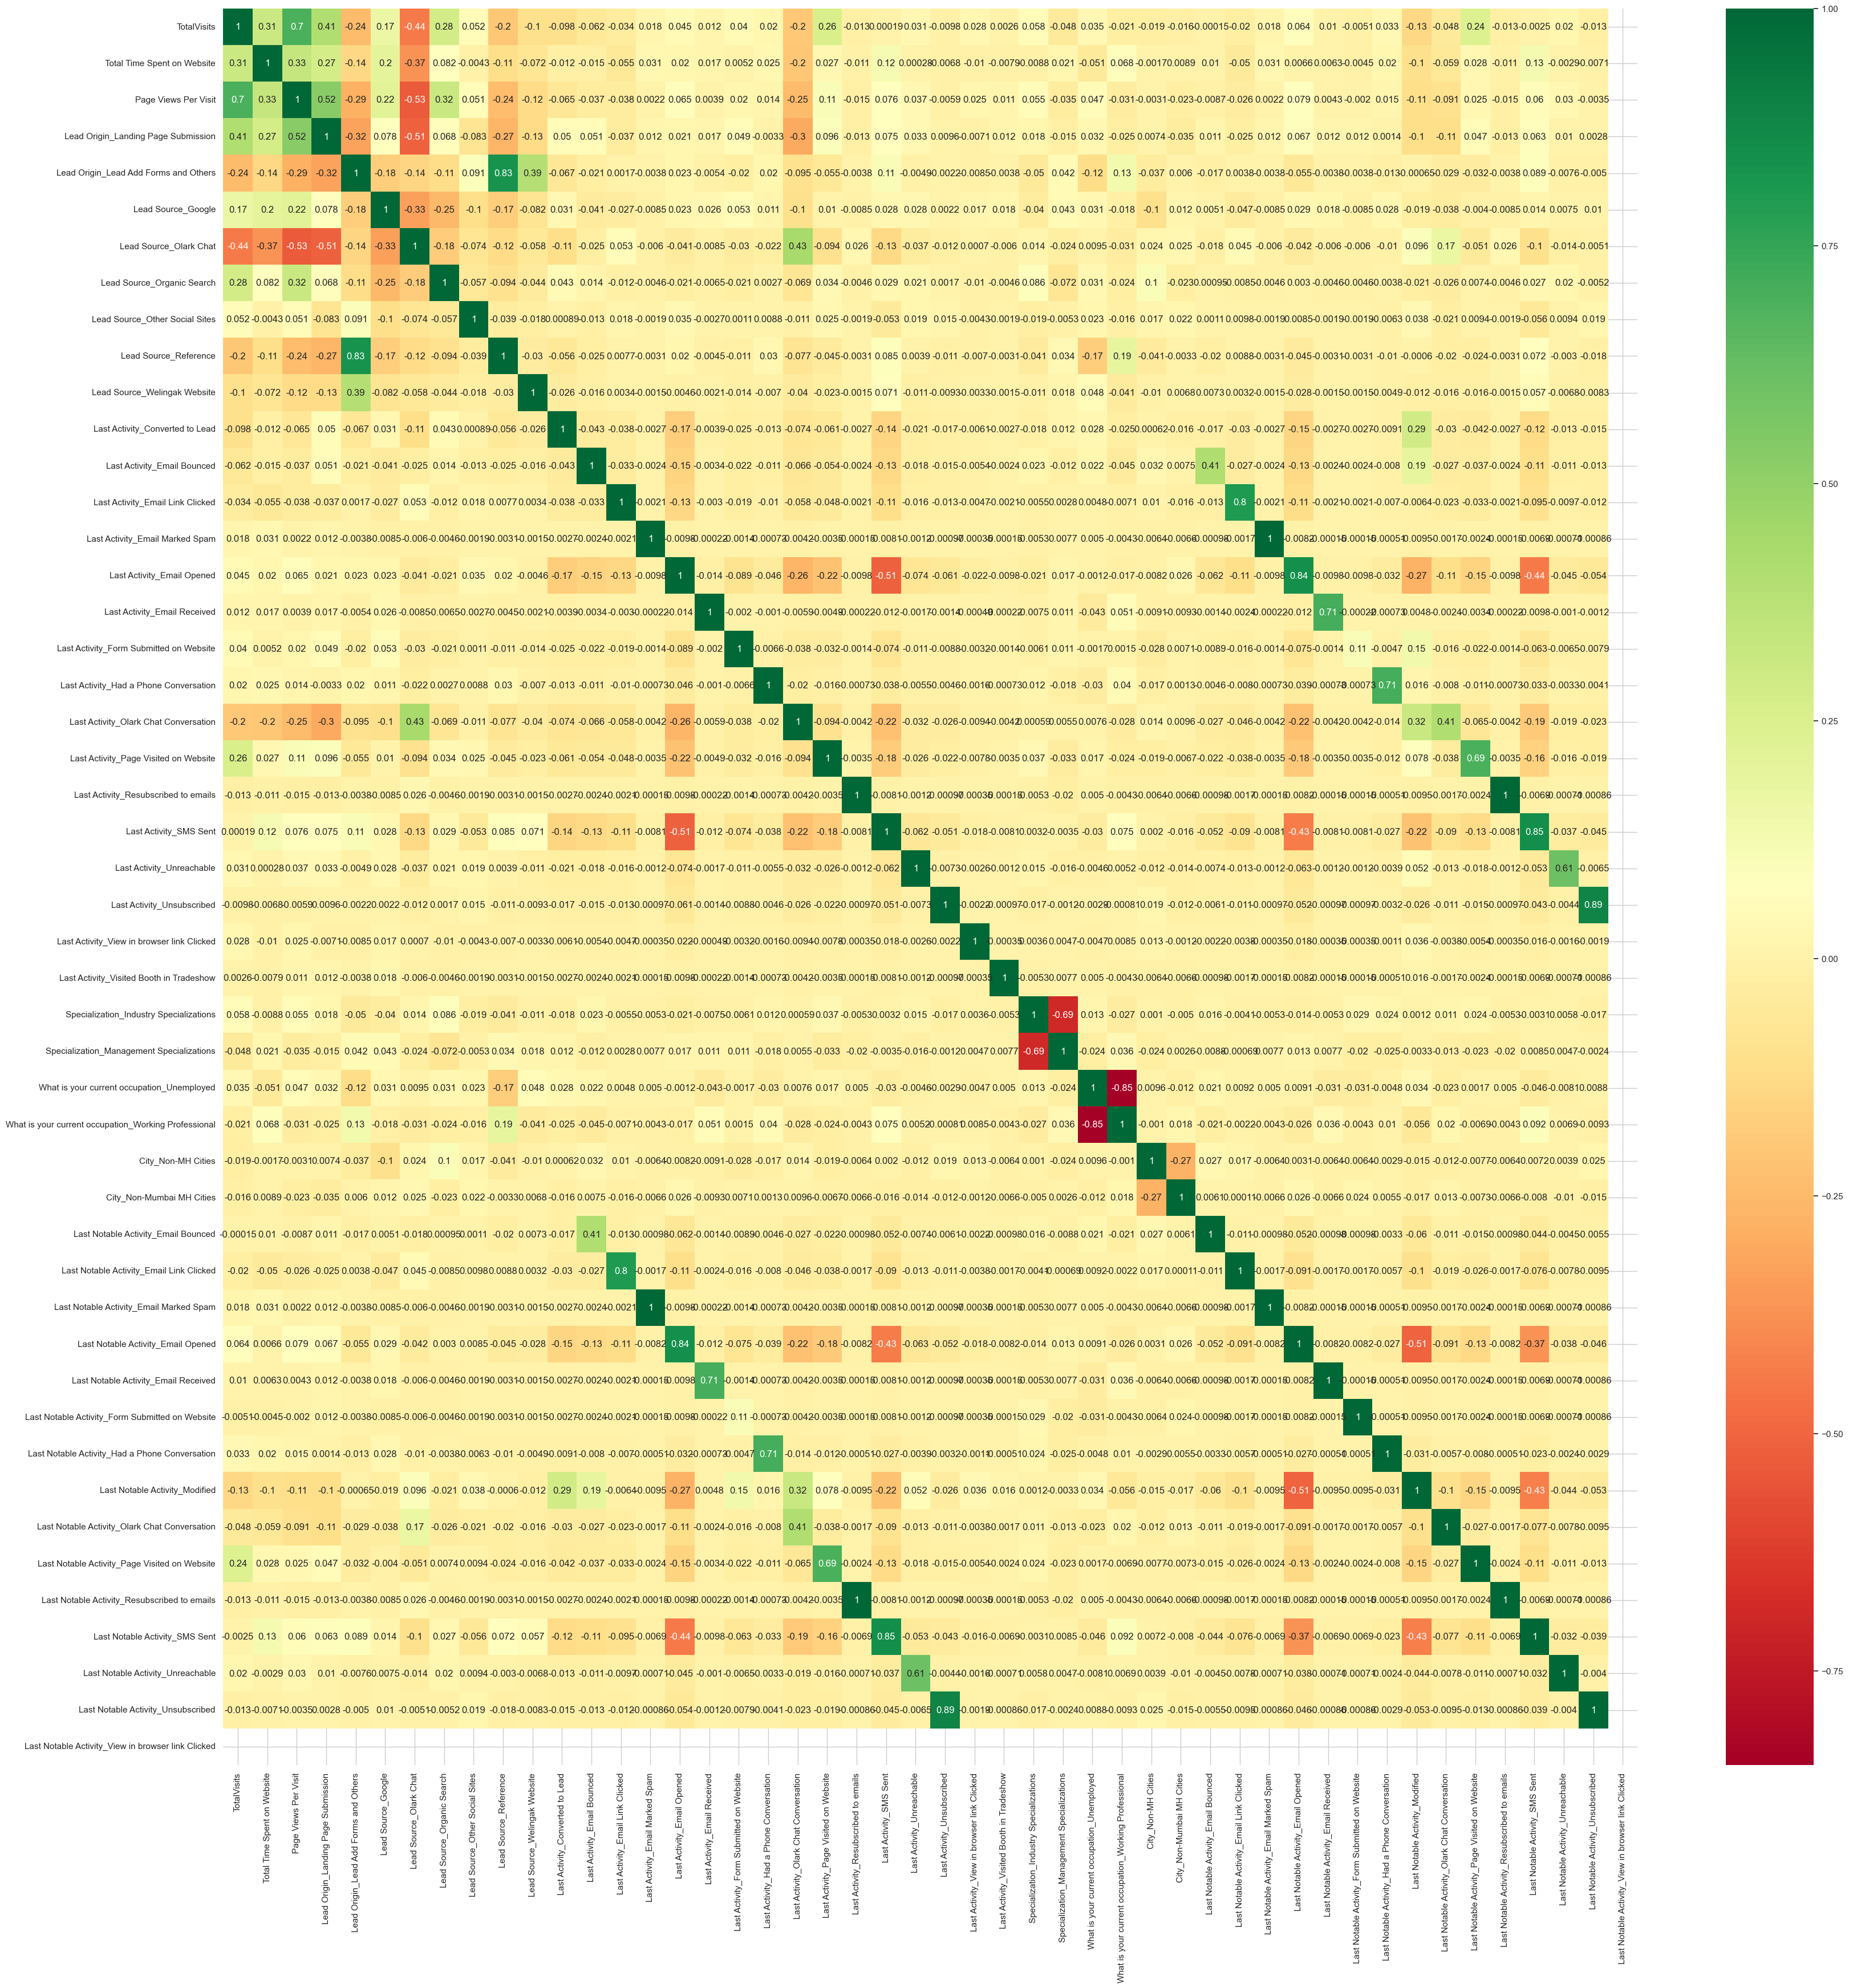

In [141]:
# Checking the correlation coefficients to find out which variables are highly correlated

plt.figure(figsize = (40,40))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Note:
1. 'Last Notable Activity_Resubscribed to emails' and 'Last Activity_Resubscribed to emails' have strong correlation.
2. 'Last Notable Activity_Email Marked Spam' and 'Last Activity_Email Marked Spam' is highly correlated .

Lets perform RFE to list out the significant columns

## Step-5  :  Building the linear Models for Train set

#### Building Model using RFE(Recursive Feature Elimination)

In [145]:
# Perform Recursive Feature Elimination 

logreg = LogisticRegression()

In [146]:
# Running RFE with 15 variables as output

rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [147]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Forms and Others', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Other Social Sites', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Marked Spam', False, 31),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Email Received', False, 19),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_Resubscribed to emails', Fa

In [148]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [149]:
# Display list of features rejected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Social Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Industry Specializations',
       'Specialization_Management Specializations',
       'What is your current occupation_Unemployed', 'City_Non-MH Cities',
       'City_Non-Mumbai MH Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable

In [150]:
# Selecting columns selected by RFE

X_train = X_train[col]

### Building Model - 1

In [152]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.1
Date:                Mon, 24 Feb 2025   Deviance:                       5620.3
Time:                        23:40:56   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3690
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3717      0.103    -23.103      0.000      -2.573      -2.170
TotalVisits                                              1.1830      0.230      5.142      0.000       0.732       1.634
Total Time Spent on Website                              4.5945      0.161     28.549      0.000       4.279       4.910
Page Views Per Visit                                    -0.9835      0.233     -4.223      0.000      -1.440      -0.527
Lead Origin_Lead Add Forms and Others                    1.5758      0.282      5.590      0.000       1.023       2.128
Lead Source_Olark Chat                                   1.0670      0.121      8.801      0.000       0.829       1.305
Lead Source_Reference                                    2.2487      0.331      6.792      0.000       1.600       2.898
Lead Source_Welingak Website                             4.0249      0.774      5.202      0.000       2.509       5.541
Last Activity_Converted to Lead                         -1.0872      0.211     -5.150      0.000      -1.501      -0.673
Last Activity_Email Bounced                             -1.8434      0.284     -6.482      0.000      -2.401      -1.286
Last Activity_Had a Phone Conversation                   0.6426      0.862      0.745      0.456      -1.047       2.332
Last Activity_Olark Chat Conversation                   -1.4566      0.161     -9.073      0.000      -1.771      -1.142
What is your current occupation_Working Professional     1.4269      0.112     12.752      0.000       1.208       1.646
Last Notable Activity_Had a Phone Conversation           2.8930      1.400      2.067      0.039       0.149       5.637
Last Notable Activity_SMS Sent                           1.5202      0.078     19.588      0.000       1.368       1.672
Last Notable Activity_Unreachable                        1.7265      0.496      3.483      0.000       0.755       2.698
========================================================================================================================
"""

#### Calculate VIF - Model 1

In [154]:
# Calculate VIF for 1st model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Forms and Others,8.22
5,Lead Source_Reference,6.89
2,Page Views Per Visit,4.44
0,TotalVisits,3.98
6,Lead Source_Welingak Website,2.36
9,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
1,Total Time Spent on Website,1.98
4,Lead Source_Olark Chat,1.42
10,Last Activity_Olark Chat Conversation,1.39


#### Note :
The above model shows that 'Lead Origin_Lead Add Forms and Others' variable has very high VIF value which is insignificant and needs to be dropped.

In [156]:
X_train.drop('Lead Origin_Lead Add Forms and Others', axis = 1, inplace = True)

### Building Model - 2

In [158]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.8
Date:                Mon, 24 Feb 2025   Deviance:                       5649.7
Time:                        23:40:57   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2424      0.099    -22.634      0.000      -2.437      -2.048
TotalVisits                                              1.1111      0.229      4.858      0.000       0.663       1.559
Total Time Spent on Website                              4.5098      0.159     28.362      0.000       4.198       4.821
Page Views Per Visit                                    -1.1406      0.231     -4.932      0.000      -1.594      -0.687
Lead Source_Olark Chat                                   0.9518      0.119      8.026      0.000       0.719       1.184
Lead Source_Reference                                    3.7056      0.209     17.739      0.000       3.296       4.115
Lead Source_Welingak Website                             5.4727      0.730      7.497      0.000       4.042       6.903
Last Activity_Converted to Lead                         -1.1437      0.210     -5.444      0.000      -1.555      -0.732
Last Activity_Email Bounced                             -1.7981      0.279     -6.449      0.000      -2.345      -1.252
Last Activity_Had a Phone Conversation                   0.6291      0.858      0.733      0.463      -1.052       2.311
Last Activity_Olark Chat Conversation                   -1.4679      0.160     -9.175      0.000      -1.781      -1.154
What is your current occupation_Working Professional     1.4101      0.112     12.643      0.000       1.192       1.629
Last Notable Activity_Had a Phone Conversation           2.8795      1.398      2.060      0.039       0.140       5.619
Last Notable Activity_SMS Sent                           1.5199      0.077     19.619      0.000       1.368       1.672
Last Notable Activity_Unreachable                        1.6997      0.495      3.436      0.001       0.730       2.669
========================================================================================================================
"""

#### Calculate VIF - Model 2

In [160]:
# Calculate VIF for 2nd model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.44
0,TotalVisits,3.98
8,Last Activity_Had a Phone Conversation,2.02
11,Last Notable Activity_Had a Phone Conversation,2.01
1,Total Time Spent on Website,1.98
3,Lead Source_Olark Chat,1.42
9,Last Activity_Olark Chat Conversation,1.39
12,Last Notable Activity_SMS Sent,1.38
10,What is your current occupation_Working Profes...,1.17
4,Lead Source_Reference,1.10


#### Note :
The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [162]:
# Dropping 'Last Notable Activity_Had a phone conversation' column from dataset

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Building Model - 3

In [164]:
# Lets build model-3

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.2
Date:                Mon, 24 Feb 2025   Deviance:                       5654.4
Time:                        23:40:57   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3656
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2414      0.099    -22.639      0.000      -2.435      -2.047
TotalVisits                                              1.1257      0.228      4.937      0.000       0.679       1.573
Total Time Spent on Website                              4.5010      0.159     28.339      0.000       4.190       4.812
Page Views Per Visit                                    -1.1456      0.231     -4.959      0.000      -1.598      -0.693
Lead Source_Olark Chat                                   0.9512      0.119      8.024      0.000       0.719       1.184
Lead Source_Reference                                    3.7006      0.209     17.714      0.000       3.291       4.110
Lead Source_Welingak Website                             5.4717      0.730      7.496      0.000       4.041       6.902
Last Activity_Converted to Lead                         -1.1417      0.210     -5.438      0.000      -1.553      -0.730
Last Activity_Email Bounced                             -1.7962      0.279     -6.445      0.000      -2.342      -1.250
Last Activity_Had a Phone Conversation                   2.1253      0.642      3.312      0.001       0.868       3.383
Last Activity_Olark Chat Conversation                   -1.4676      0.160     -9.175      0.000      -1.781      -1.154
What is your current occupation_Working Professional     1.4072      0.112     12.615      0.000       1.189       1.626
Last Notable Activity_SMS Sent                           1.5198      0.077     19.626      0.000       1.368       1.672
Last Notable Activity_Unreachable                        1.6983      0.495      3.434      0.001       0.729       2.668
========================================================================================================================
"""

In [165]:
# Dropping 'Last Notable Activity_Unreachable' column from dataset

X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

### Building Model - 4

In [167]:
# Lets build model-4

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.0
Date:                Mon, 24 Feb 2025   Deviance:                       5666.1
Time:                        23:40:57   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3645
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2281      0.099    -22.572      0.000      -2.422      -2.035
TotalVisits                                              1.1213      0.228      4.922      0.000       0.675       1.568
Total Time Spent on Website                              4.4831      0.158     28.303      0.000       4.173       4.794
Page Views Per Visit                                    -1.1292      0.231     -4.896      0.000      -1.581      -0.677
Lead Source_Olark Chat                                   0.9473      0.118      8.002      0.000       0.715       1.179
Lead Source_Reference                                    3.6949      0.209     17.699      0.000       3.286       4.104
Lead Source_Welingak Website                             5.4615      0.730      7.482      0.000       4.031       6.892
Last Activity_Converted to Lead                         -1.1519      0.210     -5.490      0.000      -1.563      -0.741
Last Activity_Email Bounced                             -1.8049      0.278     -6.482      0.000      -2.351      -1.259
Last Activity_Had a Phone Conversation                   2.1109      0.641      3.292      0.001       0.854       3.368
Last Activity_Olark Chat Conversation                   -1.4774      0.160     -9.242      0.000      -1.791      -1.164
What is your current occupation_Working Professional     1.4096      0.111     12.644      0.000       1.191       1.628
Last Notable Activity_SMS Sent                           1.5068      0.077     19.508      0.000       1.355       1.658
========================================================================================================================
"""

#### Calculate VIF - Model 4

In [169]:
# Calculate VIF for model - 4

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.43
0,TotalVisits,3.98
1,Total Time Spent on Website,1.98
3,Lead Source_Olark Chat,1.42
9,Last Activity_Olark Chat Conversation,1.39
11,Last Notable Activity_SMS Sent,1.38
10,What is your current occupation_Working Profes...,1.17
4,Lead Source_Reference,1.10
6,Last Activity_Converted to Lead,1.03
7,Last Activity_Email Bounced,1.03


#### Note : Now we can finalize this linear model-3 for further analysis due to following points:

1. VIFs for all features are less than 5.
2. p-values are almost zero for all variables.
3. Overall linear model has become significant now.

#### Now let's make predictions using this final set of features.

## Step-7  :  Predictions and Model Evaluation 

### 7.1 Prediction on Train dataset

In [173]:
# predict the probabilities on the train set using 'predict'

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

1871    0.213371
6795    0.222037
3516    0.265885
8105    0.808053
3934    0.213371
4844    0.975219
3297    0.109572
8071    0.985256
987     0.135813
7423    0.913259
dtype: float64

In [174]:
# Reshape it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21337143, 0.22203685, 0.26588495, 0.80805322, 0.21337143,
       0.97521853, 0.10957223, 0.98525585, 0.13581317, 0.91325858])

#### ~ Creating a dataframe with the predicted probabilities and the actual conversion flag

In [176]:
# Lets create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.213371
1,0,0.222037
2,0,0.265885
3,0,0.808053
4,0,0.213371


#### ~ Create New column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [178]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.213371,0
1,0,0.222037,0
2,0,0.265885,0
3,0,0.808053,1
4,0,0.213371,0


##### Now that you have made conversion predictions and also have the probabilities using them,next step is to evaluate the model.

#### ~ Create Confusion Matrix

In [181]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3499,  503],
       [ 755, 1711]], dtype=int64)

#### ~ Accuracy

In [183]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8055040197897341

##### Note :
We got Accuracy around 81% which is a good value. Let's evaluate the other metrics as well.

In [185]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

#### ~ Sensitivity

In [187]:
# Calculating the sensitivity
TP/(TP+FN)

0.6938361719383617

#### ~ Specificity

In [189]:
# Calculating the specificity
TN/(TN+FP)

0.8743128435782109

The current cut-off to loosely check the model performance was 0.5, with this we have around:
##### 81% Accuracy
##### 70% Sensitivity
##### 87% Specificity

### Create Optimal Cut-Off (ROC) curve

In [192]:
# Create ROC function

def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [193]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

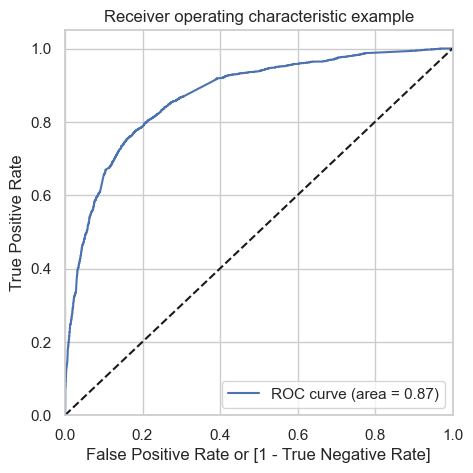

In [194]:
# Call the ROC function

plot_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Note :

The area shown under the curve of the ROC is 0.87 which is a good value to have a good model. 
Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [196]:
# Creating columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.213371,0,1,1,1,0,0,0,0,0,0,0
1,0,0.222037,0,1,1,1,0,0,0,0,0,0,0
2,0,0.265885,0,1,1,1,0,0,0,0,0,0,0
3,0,0.808053,1,1,1,1,1,1,1,1,1,1,0
4,0,0.213371,0,1,1,1,0,0,0,0,0,0,0


#### ~ Accuracy, Senstivity and Specificity with different probability cut-off values

In [198]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.578386,0.964315,0.340580
0.2,0.2,0.716450,0.921736,0.589955
0.3,0.3,0.780767,0.833333,0.748376
0.4,0.4,0.802721,0.765612,0.825587
0.5,0.5,0.805504,0.693836,0.874313
0.6,0.6,0.791435,0.574209,0.925287
0.7,0.7,0.772418,0.487024,0.948276
0.8,0.8,0.748299,0.392133,0.967766
0.9,0.9,0.696815,0.223439,0.988506


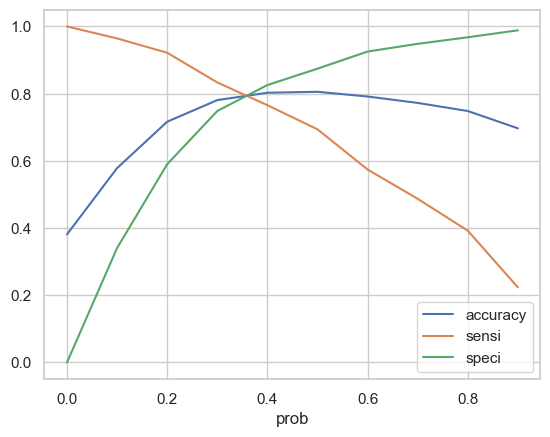

In [199]:
# Plot the matrix for different probability cutoff

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Note :

From above graph its visible that now the optimal cutoff is around 0.35.

#### ~ Create New column 'Final_Predicted' with 1 if Paid_Prob > 0.35 else 0

In [202]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.213371,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.222037,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.265885,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.808053,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.213371,0,1,1,1,0,0,0,0,0,0,0,0


#### ~ Accuracy for 'final_predicted'

In [204]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7948361162646876

In [205]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  828],
       [ 499, 1967]], dtype=int64)

In [206]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

#### ~ Sensitivity

In [208]:
# Calculating the sensitivity
TP/(TP+FN)

0.7976480129764801

#### ~ Specificity

In [210]:
# Calculating the specificity
TN/(TN+FP)

0.7931034482758621

#### Note :

With current Cutoff of 0.35, we got matrix around :

##### Accuracy - 80%
##### Senstivity - 80%
##### Specificity - 79%

### 7.2 Prediction on Test set

In [213]:
# Scale the numeric values of test set using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [214]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]


In [215]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Forms and Others,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,1.0,0.470588,0.444982,0.888889,0,0,0,0,0,0,0,0,0,0,1,0
2376,1.0,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,0,1,0
7766,1.0,0.294118,0.025968,0.555556,0,0,0,0,0,0,0,0,1,0,0,1
9199,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0
4359,1.0,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.882353,0.127641,0.166667,0,0,0,0,0,0,0,0,0,0,0,0
2152,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0
7101,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
5331,1.0,0.176471,0.707746,0.333333,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.705887
1,1,0.951338
2,1,0.668771
3,0,0.059452
4,1,0.810425


#### ~ Prediction using cut off 0.35

In [218]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.705887,1
1,1,0.951338,1
2,1,0.668771,1
3,0,0.059452,0
4,1,0.810425,1
...,...,...,...
2767,0,0.287966,0
2768,1,0.673557,1
2769,0,0.213371,0
2770,0,0.681566,1


#### ~ Accuracy

In [220]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7994227994227994

#### ~ Create Confusion Matrix

In [222]:
# Creating confusion matrix 

conf2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf2

array([[1342,  335],
       [ 221,  874]], dtype=int64)

In [223]:
# true positive
TP = conf2[1,1]

# true negatives
TN = conf2[0,0]

# false positives
FP = conf2[0,1]

# false negatives
FN = conf2[1,0]

#### ~ Sensitivity

In [225]:
# Calculating the sensitivity

TP/(TP+FN)

0.7981735159817351

#### ~ Specificity

In [227]:
# Calculating the specificity

TN/(TN+FP)

0.8002385211687537

##### Note : With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Step-8  :  Precision-Recall 

### 8.1 Prediction on Train set using Precision-Recall View

#### ~ Create Confusion Matrix

In [232]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3499,  503],
       [ 755, 1711]], dtype=int64)

#### ~ Precision

In [234]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7728093947606143

#### ~ Recall

In [236]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6938361719383617

### 8.1.1 Precision and recall tradeoff

In [238]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [239]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

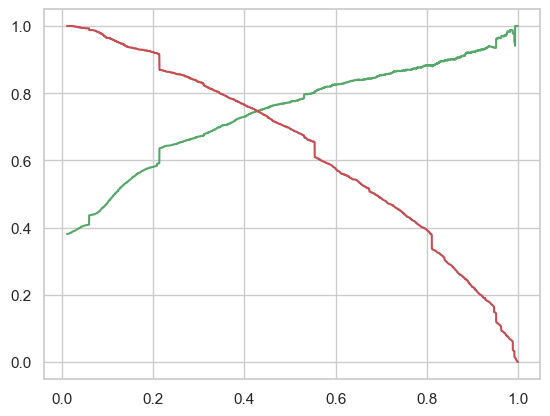

In [240]:
# Plot thresholds for Precision and Recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Note :

From above graph its visible that now the optimal cutoff is around 0.43.

#### ~ Create New column 'Final_Predicted' with 1 if Paid_Prob > 0.43 else 0

In [243]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.213371,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.222037,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.265885,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.808053,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.213371,0,1,1,1,0,0,0,0,0,0,0,0


#### ~ Create Confusion Matrix

In [245]:
# Creating confusion matrix again

conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf2

array([[3337,  665],
       [ 594, 1872]], dtype=int64)

#### ~ Accuracy

In [247]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8053494124922697

In [248]:
# true positive
TP = conf2[1,1]

# true negatives
TN = conf2[0,0]

# false positives
FP = conf2[0,1] 

# false negatives
FN = conf2[1,0]

#### ~ Precision

In [250]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7378793851005124

#### ~ Recall

In [252]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7591240875912408

##### Note : With the current cut off as 0.43, both Precision and Recall around 74% and 76%

### 8.2 Prediction on Test set using Precision-Recall View

In [255]:
# Make predictions on the test set and store it in the variable 'Y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [256]:
y_test_pred[:10]

4269    0.705887
2376    0.951338
7766    0.668771
9199    0.059452
4359    0.810425
9186    0.536933
1631    0.372477
8963    0.143703
8007    0.053034
5324    0.343670
dtype: float64

In [257]:
# Converting Y_pred to a dataframe

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
4269,0.705887
2376,0.951338
7766,0.668771
9199,0.059452
4359,0.810425


In [258]:
# Converting y_test to dataframe

lead_y_test = pd.DataFrame(y_test)

In [259]:
# Removing index for both dataframes to append them side by side 

y_pred.reset_index(drop=True, inplace=True)
lead_y_test.reset_index(drop=True, inplace=True)

In [260]:
# Append lead_y_test and y_pred

y_pred_final = pd.concat([lead_y_test, y_pred],axis=1)

# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.705887
1,1,0.951338
2,1,0.668771
3,0,0.059452
4,1,0.810425


In [261]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.705887
1,1,0.951338
2,1,0.668771
3,0,0.059452
4,1,0.810425


#### ~ Create New column 'final_predicted' with 1 if Paid_Prob > 0.43 else 0

In [263]:
# Making predictions on the test set using 0.43 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.705887,1
1,1,0.951338,1
2,1,0.668771,1
3,0,0.059452,0
4,1,0.810425,1
...,...,...,...
2767,0,0.287966,0
2768,1,0.673557,1
2769,0,0.213371,0
2770,0,0.681566,1


#### ~ Create Confusion Matrix

In [265]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1429,  248],
       [ 298,  797]], dtype=int64)

#### ~ Accuracy

In [267]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.803030303030303

In [268]:
# true positive
TP = confusion2[1,1]

# true negatives
TN = confusion2[0,0]

# false positives
FP = confusion2[0,1]

# false negatives
FN = confusion2[1,0]

#### ~ Precision

In [270]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7626794258373206

#### ~ Recall

In [272]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7278538812785388

##### Note : With the current cut off as 0.43, Precision is around 76% and Recall around 72% with 80% Accuracy

## Conclusion :

#### There are some significant variables that mattered the most in identifying the promising "Hot Leads" for company:

1. "TotalVisits" : The total number of visits made by the customer on the website.
2. "Total Time Spent on Website"
3. "Page Views Per Visit" : Average number of pages on the website viewed during the visits.
4. "Lead Source" : The source of Lead can be, includes a. Google
b. Olark Chat
c. Welingak website
d. Reference
5. "Last Activity" : Majority of last activity performed by customer can be
a. Olark Chat Conversation
b. Converted to Lead
c. Email Bounced
d. Had a Phone Conversation
6. "Last Notable Activity" : The last notable activity performed by the customer can be SMS Sent
7. The Leads having Current Occupation as "Working Professional".

#### The X Education can flourish their high conversion chance by keeping above factors in mind and can get almost all the potential buyers to become their Converted Leads and buy their courses.